In [10]:
import math
import random

import numpy as np
from Crypto.Util.number import bytes_to_long, getPrime, inverse, long_to_bytes

In [11]:
def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a % b)

# Prerequisites

1. Modular exponentiation 
* https://crypto.stanford.edu/pbc/notes/numbertheory/exp.html
* https://en.wikipedia.org/wiki/Modular_exponentiation  
* https://www.geeksforgeeks.org/modular-exponentiation-power-in-modular-arithmetic/

2. Modular multiplicative inverse
* https://en.wikipedia.org/wiki/Modular_multiplicative_inverse

3. What is a trapdoor?
* https://en.wikipedia.org/wiki/Trapdoor_function

4. Euler's totient function
* https://crypto.stanford.edu/pbc/notes/numbertheory/units.html
* https://en.wikipedia.org/wiki/Euler%27s_totient_function

# Theory

**Euler’s Formula for $pq$.**  
Let $p$ and $q$ be distinct primes and let $g = \gcd(p − 1, q − 1)$. Then  
$$a^{(p- 1)(q- 1)/g} \equiv 1 \ \bmod \ pq$$
for all $a$ satisfying $\gcd(a, pq) = 1$.

In particular, if $p$ and $q$ are odd primes, then  
$$a^{(p-1)(q-1)/2} \equiv 1  \bmod \ pq$$
for all $a$ satisfying $gcd(a, pq) = 1$.

Let $p$ be a prime and let $e \geq 1$ be an integer satisfying $gcd(e, p-1) = 1$.  
$e$ has an inverse modulo $p − 1$, say $de \equiv 1 \bmod  p - 1$.  

Then the congruence
$x^e \equiv c \bmod  p$   has the unique solution $x \equiv c^d \bmod p$.

Let $p, q$ be distinct primes and let $e \geq 1$ be an integer satisfying
$\gcd(e, (p-1)(q-1)) = 1$.  
$e$ has an inverse modulo $(p − 1)(q-1)$, say  
$de \equiv 1 \ (\bmod \ (p − 1)(q-1))$.  
Then the congruence
$x^e \equiv c \ (\bmod \ pq)$  
has the unique solution $x \equiv c^d \ (\bmod \ pq)$.

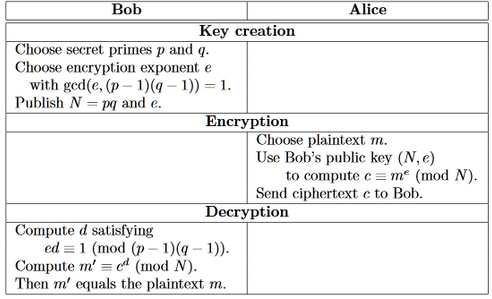
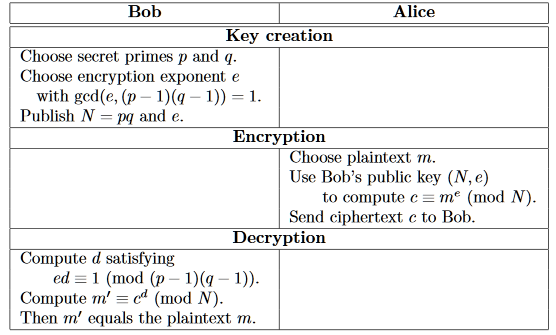

$m$ = message   
$c$ = ciphertext  
We usually work with $m$ and $c$ mod $N = p\cdot q$  

$d$ = decryption exponent (private)  
$e$ = encryption exponend (public)  
We usually work with $d$ and $e$ mod $(p-1)(q-1) = \varphi(N)$  


If you know $p$ or $q$ => you know $\varphi(N)$ => you can find $d$

# RSA code

## Toy implementation

In [33]:
from Crypto.Util.number import getRandomInteger, getPrime

In [38]:
def create_key_rsa(nbits: int, e=None):
    p = getPrime(nbits // 2)
    q = getPrime(nbits // 2)

    if e is None:
        e = 65567

    assert gcd(e, (p - 1) * (q - 1)) == 1
    N = p * q
    return (N, e), (p, q)


def encrypt_rsa(m, e, N):
    assert m < N
    c = pow(m, e, N)
    return c


def decrypt_rsa(c, p, q, e, N):
    d = inverse(e, (p - 1) * (q - 1))
    assert (d * e) % ((p - 1) * (q - 1)) == 1
    m = pow(c, d, N)
    return m

In [39]:
(N, e), (p, q) = create_key_rsa(2048)

In [40]:
m = b"secret"
m = bytes_to_long(m)
c = encrypt_rsa(m, e, N)
c

10754710836541878633503852052540399105068221433602147930836429374447203905887483241967983570653321149619980942368936005521947255803277769404327558332804860239306471507538269113136823171673365466692421768761794138714855691191220268684381457113074223361172850923011113629283148631666552074417390311081062438390053372679279891301361679554673356873149435371973929005405628895986389506307381952758349062885561997824373534522968471072559345515824718661841796744383702742905769352633423250053453234728527012105415180898270677126293114350216656806696697110655616818613815946277756584918825116983268128212999696132491060251101

In [41]:
long_to_bytes(decrypt_rsa(c, p, q, e, N))

b'secret'

## Library

https://pycryptodome.readthedocs.io/en/latest/src/public_key/rsa.html

In [12]:
from Crypto.PublicKey import RSA

In [13]:
key = RSA.generate(2048)

In [18]:
key.n.bit_length()

2048

# More resources:

* https://leimao.github.io/article/RSA-Algorithm/
* https://en.wikipedia.org/wiki/RSA_(cryptosystem)
* https://people.csail.mit.edu/rivest/Rsapaper.pdf
* https://en.wikipedia.org/wiki/Fermat_number